In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
COP_U = pd.read_csv('LPOINT_BIG_COMP_03_COP_U.csv',encoding='cp949')

# 주말 이용 비율

In [3]:
COP_U.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500


In [4]:
#문자열을 datetime 자료형으로 바꿔주기
COP_U['data_time']=COP_U['de_dt'].astype('str')
COP_U['data_time'] = pd.to_datetime(COP_U['data_time'])

In [5]:
#날짜로부터 요일 구하기
COP_U['weekday']=COP_U['data_time'].dt.weekday #월:0 ~ 일:6

In [6]:
COP_U.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,data_time,weekday
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,2021-10-26,1
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,2021-11-06,5
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,2021-02-11,3
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,2021-09-20,0
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,2021-10-10,6


In [7]:
def func(x) :
    if x > 4 :
        return 'weekend'
    else :
        return 'weekday'
COP_U['weekend'] = COP_U['weekday'].apply(lambda x : func(x))

In [8]:
COP_U.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,data_time,weekday,weekend
0,M839993508,21102612B015763935,B01,B010012,1,20211026,20211026,12,60000,2021-10-26,1,weekday
1,M839993508,21110610B014219744,B01,B010012,1,20211106,20211106,10,17100,2021-11-06,5,weekend
2,M839993508,21021112B013419710,B01,B010012,1,20210211,20210211,12,136500,2021-02-11,3,weekday
3,M839993508,21092010B012637545,B01,B010012,1,20210920,20210920,10,34200,2021-09-20,0,weekday
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,2021-10-10,6,weekend


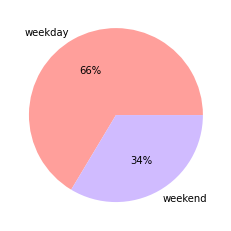

In [9]:
colors = sns.color_palette('pastel')[3:5]

labels = COP_U['weekend'].value_counts().index.tolist()
ratio = COP_U['weekend'].value_counts().values.tolist()

plt.pie(ratio, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

# 카페 이용률

In [10]:
fnb = COP_U.loc[COP_U['cop_c'].isin(['D01','D02'])]
fnb.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,data_time,weekday,weekend
4,M839993508,21101009D015920171,D01,D010614,1,20211010,20211010,9,2500,2021-10-10,6,weekend
6,M348796971,21103114D013043421,D01,D010398,1,20211031,20211031,14,4600,2021-10-31,6,weekend
17,M348796971,21080712D012470819,D01,D010398,1,20210807,20210807,12,7800,2021-08-07,5,weekend
18,M348796971,21081014D011253058,D01,D010398,1,20210810,20210810,14,5900,2021-08-10,1,weekday
19,M348796971,21081210D014440902,D01,D010398,1,20210812,20210812,10,4900,2021-08-12,3,weekday


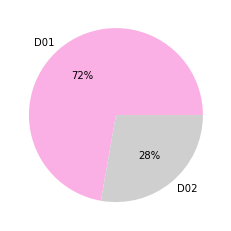

In [11]:
colors = sns.color_palette('pastel')[6:8]

labels = fnb['cop_c'].value_counts().index.tolist()
ratio = fnb['cop_c'].value_counts().values.tolist()

plt.pie(ratio, labels = labels, colors = colors, autopct='%.0f%%')
plt.show() #D01: 롯데리아, D02: 엔젤리너스

# 카페 방문시간

In [13]:
cafe = COP_U.loc[COP_U['cop_c']=='D02']
cafe.head()

,cust,rct_no,cop_c,br_c,chnl_dv,de_dt,vst_dt,de_hr,buy_am,data_time,weekday,weekend
42,M355649173,21102914D021083700,D02,D020485,1,20211029,20211029,14,80200,2021-10-29,4,weekday
67,M267409798,21102815D022091253,D02,D020374,1,20211028,20211028,15,9100,2021-10-28,3,weekday
83,M725568174,21081615D025551251,D02,D020158,1,20210816,20210816,15,5700,2021-08-16,0,weekday
88,M502325468,21110914D021813670,D02,D020158,1,20211109,20211109,14,11300,2021-11-09,1,weekday
89,M502325468,21072213D020814740,D02,D020158,1,20210722,20210722,13,11000,2021-07-22,3,weekday


<AxesSubplot:xlabel='de_hr', ylabel='count'>

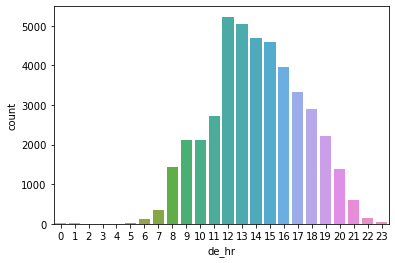

In [14]:
sns.countplot(x=cafe['de_hr']) #점심 식사 후, 카페를 많이 방문하는 것 같습니다..

# 카페 평균 이용 금액

In [15]:
cafe['buy_am'].mean()

10130.199842351742